In [110]:
import util
import gensim
from gensim.models import TfidfModel
import nltk
import pandas as pd
%reload_ext autoreload
%autoreload 2

In [2]:
los_acosta_dict = util.songs_dictionary('Los Acosta')

Searching for songs by Los Acosta...

Song 1: "Como Una Novela"
Song 2: "Contra El Dragon"
Song 3: "Voy A Pintar Un Corazón"
Song 4: "Tiene Apenas 16"
Song 5: "El Beso Del Olvido"
Song 6: "Tonto Corazon"
Song 7: "Jamás"
Song 8: "Mi Última Llamada"
Song 9: "Deja Una Rosa En Tu Balcon"
Song 10: "Que pena"
Song 11: "A Partir De Hoy"
Song 12: "Mi Corazon Es Un Vagabundo"
Song 13: "El Amor De Mi Vida"
Song 14: "Amor Fugaz"
Song 15: "Como Un Pajarillo"
Song 16: "Una Chica Esta Llorando"
Song 17: "Mentiras"
Song 18: "Separados"
Song 19: "Sin Razon"
Song 20: "Soy mexicano"
Song 21: "Siempre Te Recordare"
Song 22: "Te amare hasta morir"
Song 23: "Me parece"
Song 24: "Que Seas Feliz Con El"
Song 25: "Pero te voy a olvidar"
Song 26: "Muñequita"
Song 27: "Todavía te amo"
Song 28: "Caprichos De Mujer"
Song 29: "Nostalgia"
Song 30: "Y Como Te Va"
Song 31: "Borracho De Tristeza"
Song 32: "Nunca supe ms de tí"
Song 33: "Te Necesito"
Song 34: "Me Llamas Para Despedirte"
Song 35: "En aquel café"
Song 36

In [3]:
raw_corpus = util.raw_corpus(los_acosta_dict)
cleaned_corpus = util.cleaned_corpus(los_acosta_dict)

In [7]:
unigrams = util.ngram_freq(cleaned_corpus, 1)
unigrams_dict = {r['1-gram']:r['Frequency'] for i, r in unigrams.iterrows()}

In [9]:
unigrams[:10]

,1-gram,Frequency
0,amor,200
1,si,148
2,quiero,114
3,voy,80
4,vida,70
5,mas,63
6,hoy,63
7,corazon,63
8,dolor,60
9,corazón,59


In [30]:
bigrams = util.ngram_freq(cleaned_corpus, 2)
bigrams

,2-gram,Frequency
0,"oh, oh",38
1,"amo, amo",18
2,"algun, lugar",16
3,"tal, vez",14
4,"busco, corazón",12
5,"quiero, ser",10
6,"voy, ponerme",9
7,"conozco, bien",9
8,"adiós, adiós",9
9,"tan, lleno",8


In [10]:
ners = util.ners_in_corpus(raw_corpus)

Exception: Check whether you have started the CoreNLP server e.g.
$ cd stanford-corenlp-full-2015-12-09/ 
$ java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer

In [ ]:
util.count_dict(ners['ORGANIZATION'])

In [11]:
util.create_cloud_image('logo1.jpg', unigrams, 'Nube de palabras de las canciones de Los Acosta')

TypeError: join() takes exactly one argument (2 given)

In [12]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from os import path

In [13]:
logo1 = np.array(Image.open(path.join(os.getcwd(), "logo1.jpg")))
logo2 = np.array(Image.open(path.join(os.getcwd(), "logo2.jpg")))
logo3 = np.array(Image.open(path.join(os.getcwd(), "logo3.jpg")))
logo4 = np.array(Image.open(path.join(os.getcwd(), "logo4.jpg")))
logo5 = np.array(Image.open(path.join(os.getcwd(), "logo5.jpg")))
logo6 = np.array(Image.open(path.join(os.getcwd(), "logo6.jpg")))

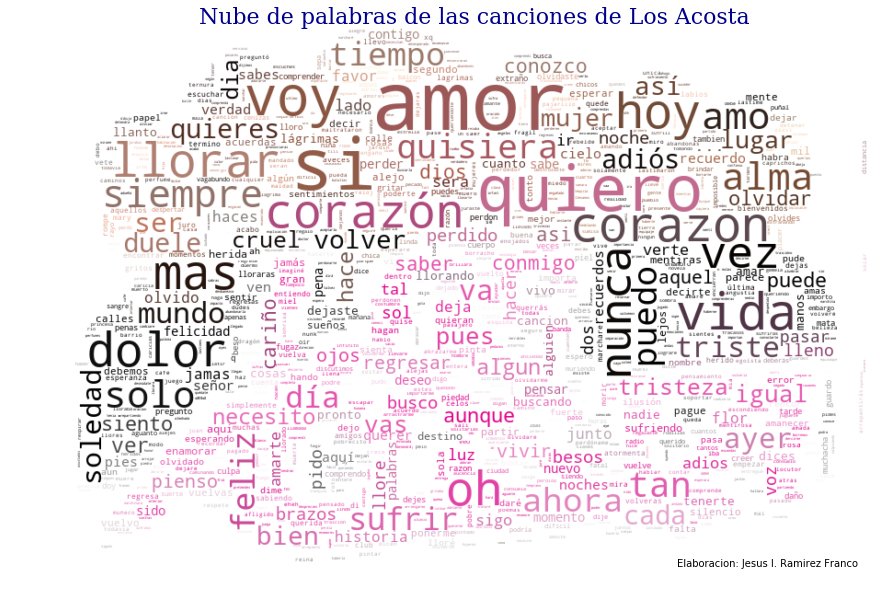

In [14]:
font = {
    'family': 'serif',
    'color':  'darkblue',
    'weight': 'normal',
    'size': 22,
}


explanation = 'Elaboracion: Jesus I. Ramirez Franco'
wcf = WordCloud(background_color="White", max_words=1000, mask=logo3,
                max_font_size=90, random_state=42)
wcf.generate_from_frequencies(unigrams_dict)
image_colors = ImageColorGenerator(logo3)
plt.figure(figsize=[15,15])
plt.text(180, 10, 'Nube de palabras de las canciones de Los Acosta', fontdict=font)
plt.text(700, 600, explanation)
plt.imshow(wcf.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
tokenized_corpus = [nltk.word_tokenize(t) for t in cleaned_corpus]
dictionary = gensim.corpora.Dictionary(tokenized_corpus)
bow = [dictionary.doc2bow(line) for line in tokenized_corpus]
TFIDF = TfidfModel(bow)
tf_idf = [TFIDF[b] for b in bow]

In [16]:
n_list = [3, 4, 5, 7, 10]
iter_list = [200]
pass_list = [150]
decay_list = [0.7]
results_df, best_model, best_topics = util.dif_models(bow, dictionary, n_list, iter_list, pass_list, decay_list)

In [17]:
results_df

,Number of Topics,Iterations,Passes,Decay,Perplexity,Coherence
0,3,200,150,0.7,-6.770363,-2.085257
1,4,200,150,0.7,-6.739811,-2.145207
3,7,200,150,0.7,-6.719390,-3.971166
2,5,200,150,0.7,-6.727039,-3.993372
4,10,200,150,0.7,-6.704205,-4.972085


In [18]:
util.print_topics(best_topics)

Topic  0
amor, oh, hoy, voy, mas, si, solo, quiero, vida, nunca
**************************************************************************************************
Topic  1
si, amor, quiero, amo, voy, día, vida, tiempo, corazon, corazón
**************************************************************************************************
Topic  2
amor, quiero, si, vez, llorar, dolor, corazon, corazón, vida, siempre
**************************************************************************************************


In [22]:
n_list = [4, 5, 7, 10]
iter_list = [200]
pass_list = [150]
decay_list = [0.7]
results_df_bis, best_model_bis, best_topics_bis = util.dif_models(tf_idf, dictionary, n_list, iter_list, pass_list, decay_list)

In [23]:
results_df_bis

,Number of Topics,Iterations,Passes,Decay,Perplexity,Coherence
0,4,200,150,0.7,-9.102877,-9.025117
1,5,200,150,0.7,-9.509129,-11.015099
2,7,200,150,0.7,-10.248819,-14.772899
3,10,200,150,0.7,-11.247524,-16.317708


In [24]:
util.print_topics(best_topics_bis)

Topic  0
quiero, mas, volver, palabras, llore, vivir, necesito, debemos, si, llorar
**************************************************************************************************
Topic  1
oh, voy, algun, día, llorar, lugar, tan, pido, deja, si
**************************************************************************************************
Topic  2
mundo, igual, vez, quisiera, cada, vagabundo, voy, pinta, si, hoy
**************************************************************************************************
Topic  3
amo, quisiera, quiero, dices, va, duele, jamás, así, corazón, busco
**************************************************************************************************


In [26]:
paquita_dict = util.songs_dictionary('Paquita la del Barrio')

Searching for songs by Paquita la del Barrio...

Changing artist name to 'Paquita La Del Barrio'
Song 1: "Rata De Dos Patas"
Song 2: "Tres Veces Te Engane"
Song 3: "Cheque En Blanco"
Song 4: "Romeo y Su Nieta"
Song 5: "Pobre Pistolita"
Song 6: "Hombres malvados"
Song 7: "Viejo rabo verde"
Song 8: "El fracaso de mi amor"
Song 9: "Tragos amargos"
Song 10: "Chiquito"
Song 11: "Las rodilleras"
Song 12: "Taco Placero"
Song 13: "Que Me Perdone Tu Perro"
Song 14: "Vivo Contenta"
Song 15: "No Hay Quinto Malo"
Song 16: "Si yo fuera varon"
Song 17: "Pierdeme El Respeto"
Song 18: "Resulto vegetariano"
Song 19: "Fichas negras"
Song 20: "Azul celeste"
Song 21: "Te Parto El Alma"
Song 22: "Me saludas a la tuya"
Song 23: "Invitame A Pecar"
Song 24: "Dicen que tu"
Song 25: "Al Cuarto Vaso"
Song 26: "Cobarde"
Song 27: "Lampara Sin Luz"
Song 28: "Hipocrita"
Song 29: "Como un perro"
Song 30: "Amor Perdido"
Song 31: "Juro Que Nunca Volvere"
Song 32: "Amor de la calle"
Song 33: "Seis Pies Abajo"
Song 34: "

In [29]:
paquita_cleaned_corpus = util.cleaned_corpus(paquita_dict)

In [31]:
paquita_unigrams = util.ngram_freq(paquita_cleaned_corpus, 1)
paquita_unigrams_dict = {r['1-gram']:r['Frequency'] for i, r in paquita_unigrams.iterrows()}
paquita_unigrams[:20]

,1-gram,Frequency
0,si,71
1,vida,37
2,voy,35
3,amor,35
4,quiero,34
5,hoy,27
6,...,26
7,mas,22
8,ahora,19
9,perro,18


In [32]:
tokenized_corpus_p = [nltk.word_tokenize(t) for t in paquita_cleaned_corpus]
dictionary_p = gensim.corpora.Dictionary(tokenized_corpus_p)
bow_p = [dictionary_p.doc2bow(line) for line in tokenized_corpus_p]
TFIDF_p = TfidfModel(bow_p)
tf_idf_p = [TFIDF_p[b] for b in bow_p]

In [33]:
results_df_p, best_model_p, best_topics_p = util.dif_models(tf_idf_p, dictionary_p, n_list, iter_list, pass_list, decay_list)

In [34]:
results_df_p

,Number of Topics,Iterations,Passes,Decay,Perplexity,Coherence
3,10,200,150,0.7,-11.571964,-15.073846
2,7,200,150,0.7,-10.474685,-17.177388
0,4,200,150,0.7,-9.172612,-17.738490
1,5,200,150,0.7,-9.637353,-17.819362


In [35]:
util.print_topics(best_topics_p)

Topic  0
coro, 1, hora, 2, hombres, componen, malvados, capamos, gracias, odio
**************************************************************************************************
Topic  1
cobarde, hombre, lleve, poquito, ¿que, ajenos, pecho, llegue, callaste, casa
**************************************************************************************************
Topic  2
why, bonita, callejera, lampara, luz, arrastrate, pagar, gusano, chorus, hipocrita
**************************************************************************************************
Topic  3
recordar, voy, vivo, vas, heche, edad, ahi, todavía, mandarte, vaso
**************************************************************************************************
Topic  4
usted, tres, veces, sabor, engane, engaño, oidos, chifle, sensibles, miras
**************************************************************************************************
Topic  5
aunque, perro, olvidar, arrastrar, miel, amarga, cueste, volver, pierdeme, res

In [36]:
uni_corpus = paquita_cleaned_corpus+cleaned_corpus

In [37]:
tokenized_corpus_u = [nltk.word_tokenize(t) for t in uni_corpus]
dictionary_u = gensim.corpora.Dictionary(tokenized_corpus_u)
bow_u = [dictionary_u.doc2bow(line) for line in tokenized_corpus_u]
TFIDF_u = TfidfModel(bow_u)
tf_idf_u = [TFIDF_u[b] for b in bow_u]

In [38]:
results_df_u, best_model_u, best_topics_u = util.dif_models(tf_idf_u, dictionary_u, n_list, iter_list, pass_list, decay_list)
results_df_u

,Number of Topics,Iterations,Passes,Decay,Perplexity,Coherence
0,4,200,150,0.7,-9.461160,-7.381459
1,5,200,150,0.7,-9.859248,-8.988570
2,7,200,150,0.7,-10.612383,-13.613910
3,10,200,150,0.7,-11.608316,-15.563390


In [39]:
util.print_topics(best_topics_u)

Topic  0
nunca, vas, ven, día, si, aunque, coro, llore, quiero, vuelva
**************************************************************************************************
Topic  1
voy, quiero, adiós, mas, hoy, si, amo, corazón, amor, soledad
**************************************************************************************************
Topic  2
oh, algun, cobarde, lugar, why, puedo, pido, volver, tan, quisiera
**************************************************************************************************
Topic  3
va, vez, cada, si, dolor, necesito, busco, perro, quiero, amor
**************************************************************************************************


In [47]:
priors={
    'amo':1,
    'amor':1,
    'quiero':1,
    'corazón':1,
    'siento':1,
    'perro':3,
    'rata':3,
    'inutil':3,
    'odio':3,
    'desprecio':3,
    'cobarde':3
}

In [48]:
guided_model = util.make_LDA(tf_idf_u, dictionary_u, 4, prior=priors, iter_v=200, pass_v=150, decay_v=0.7)

In [49]:
topics, perplexity, coherence = util.evaluate_model(guided_model, tf_idf_u, dictionary_u, 4)

In [50]:
print('perplexity: ', perplexity)
print('coherence: ', coherence)
print()
util.print_topics(topics)

perplexity:  62.57359105199075
coherence:  -9.235847922692496

Topic  0
nunca, vas, ven, día, si, aunque, coro, llore, vuelva, mundo
**************************************************************************************************
Topic  1
quiero, amo, corazón, amor, voy, adiós, mas, hoy, siento, si
**************************************************************************************************
Topic  2
oh, algun, lugar, why, puedo, pido, cobarde, volver, tan, quisiera
**************************************************************************************************
Topic  3
perro, va, desprecio, rata, vez, cada, odio, si, dolor, necesito
**************************************************************************************************


In [134]:
from bokeh.plotting import figure, show
from bokeh.sampledata.iris import flowers
from bokeh.transform import factor_cmap, factor_mark
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [164]:
doc_topics_matrix = util.doc_topic_matrix(guided_model, tf_idf_u)

In [165]:
len(doc_topics_matrix)

159

In [169]:
data_plot = doc_topics_matrix[[1,3]].reset_index()
data_plot['artist'] = data_plot['index'].apply(lambda x: 'Paquita la del Barrio' if x <= 46 else 'Los Acosta')
data_plot.columns = ['index','romanticismo', 'odio', 'artist']
data_plot = data_plot.drop('index', axis=1)
data_plot = data_plot[(data_plot['romanticismo']>0)&(data_plot['odio']>0)]

In [197]:
USES = list(data_plot['artist'].unique())
MARKERS = ['circle',  'circle',]

p = figure(title = "Distribucion tematica de las canciones\n de Los Acosta vs Paquita la del Barrio")
p.xaxis.axis_label = 'Romanticismo'
p.yaxis.axis_label = 'Odio y desprecio'

#p.scatter("romanticismo", "odio", source=data_plot, legend="Artist", fill_alpha=0.4, size=12)


p.scatter("romanticismo", "odio", source=data_plot, legend="artist", fill_alpha=1, size=7,
          marker=factor_mark('artist', MARKERS, USES),
          color=factor_cmap('artist', ['#932567', '#79D151'], USES))

#p.line(x=data_plot["DIST_CLASS"], y=data_plot['l_y'])

show(p)

In [67]:
uni_corpus[46:]

['novela vida siempre nunca supiste ternuras comprender extranan trampas mujer novela tan dificil contar escribimos capitulo amor corazon lloraba dolor actor pesimo actriz maximo fingiste bien tiempo crei papel sos unica solamente lado perdedor pues aun amo novela tan romantica tan cruel escrita lagrimas mas quejo destino asi actor pesimo actriz maximo fingiste bien tiempo crei papel sos unica solamente lado perdedor pues aun amo',
 'vida cuento paso princesa ojos embrujo besarme muchas cosas prometió vida ficción castillo amargura dejo calabozo prisionero amor dragón mentiras luche mano pies derrumbe dragón belleza proteste así luchando corazón conquiste vida manzana probé veneno labios embriague pócima encantado quede dragón mentiras luche mano pies derrumbe dragón belleza proteste así luchando corazón conquiste',
 'día día mente siempre siento vació tan difícil llenar hacer olvidar hacer si día día desespero mas mas inútil ciudad nadie puede consolar solo herida sanaras voy pintar c

In [60]:
from IPython.display import HTML, display
import tabulate
table = [["Sun",696000,1989100000],
         ["Earth",6371,5973.6],
         ["Moon",1737,73.5],
         ["Mars",3390,641.85]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Sun,696000,1.9891e+09
Earth,6371,5973.6
Moon,1737,73.5
Mars,3390,641.85


In [61]:
from IPython.display import HTML, display

data = [[1,2,3],
        [4,5,6],
        [7,8,9],
        ]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

1,2,3
4,5,6
7,8,9
